In [26]:
##mfcc approach
# %pip install librosa numpy tensorflow matplotlib
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt




In [9]:
import os
# %pip install pandas
import pandas as pd
def extract_label(file_path):
    label = os.path.splitext(os.path.basename(file_path))[0]
    return label

In [10]:
extract_label("C://Users//adhik//OneDrive//Desktop//indian classical to notation//test//dataset//asavari27.wav")

'asavari27'

In [11]:
## time to create dataframe
def create_data_frame(audio_folder):
    df_data = {'file_path':[],'label':[]}

    for root,dirs,files in os.walk(audio_folder):
        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                label = extract_label(file_path)

                df_data['file_path'].append(file_path)
                df_data['label'].append(label)

    df = pd.DataFrame(df_data)
    return df            

In [24]:
audio_folder = 'C://Users//adhik//OneDrive//Desktop//indian classical to notation//test//dataset'
df = create_data_frame(audio_folder)
df['label'] = df['label'].str.replace('\d+', '', regex=True)

In [25]:
df

file_path    label
0   C://Users//adhik//OneDrive//Desktop//indian cl...  asavari
1   C://Users//adhik//OneDrive//Desktop//indian cl...  asavari
2   C://Users//adhik//OneDrive//Desktop//indian cl...  asavari
3   C://Users//adhik//OneDrive//Desktop//indian cl...  asavari
4   C://Users//adhik//OneDrive//Desktop//indian cl...  asavari
..                                                ...      ...
77  C://Users//adhik//OneDrive//Desktop//indian cl...    yaman
78  C://Users//adhik//OneDrive//Desktop//indian cl...    yaman
79  C://Users//adhik//OneDrive//Desktop//indian cl...    yaman
80  C://Users//adhik//OneDrive//Desktop//indian cl...    yaman
81  C://Users//adhik//OneDrive//Desktop//indian cl...    yaman

[82 rows x 2 columns]

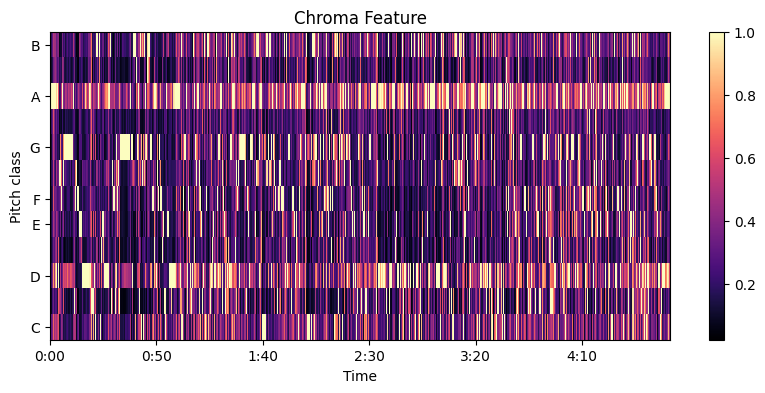

(12, 12552)

In [27]:
## data analysis
audio1 = 'C://Users//adhik//OneDrive//Desktop//indian classical to notation//test//dataset//bageshree02.wav'
from scipy.io import wavfile as wav
wavesr2, wave_audio=wav.read(audio1)
y, sr = librosa.load(audio1)
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma Feature')
plt.show()
chroma.shape

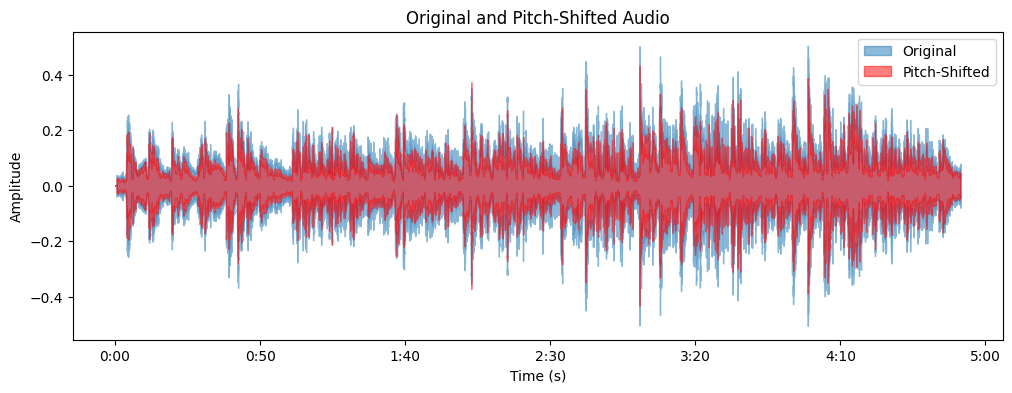

In [29]:
# Apply pitch shift to the audio signal
y_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=3.0)

# Plot the original and pitch-shifted audio signals
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.5, label='Original')
librosa.display.waveshow(y_shifted, sr=sr, alpha=0.5, color='r', label='Pitch-Shifted')
plt.title('Original and Pitch-Shifted Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [30]:
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

# Get the pitch with the maximum magnitude for each frame
pitch = np.argmax(magnitudes, axis=0)

# Plot the pitch values
# plt.figure(figsize=(10, 4))
# # librosa.display.specshow(pitch, y_axis='chroma', x_axis='time')
# plt.colorbar()
# plt.title('Pitch Estimation')
# plt.show()
pitch.shape
# zero_crossings = librosa.feature.zero_crossing_rate(y)
# zero_crossings.shape
# rolloff = librosa.feature.spectral_rolloff(y=y)
# rolloff.shape
# spectral_flux = librosa.onset.onset_strength(y=y, sr=sr, feature='spectral')
# spectral_flux

(12552,)

In [31]:
def features_extractor_mfccs(file):
    audio, sample_rate = librosa.load(file)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate,n_mfcc= 40)
    mfccs_scaled_features = np.mean(mfccs.T, axis=0)
    return mfccs_scaled_features

In [34]:
features_extractor_mfccs("C://Users//adhik//OneDrive//Desktop//indian classical to notation//test//dataset//bageshree02.wav")

array([-246.02486   ,  131.5703    ,  -36.12218   ,   -0.37939298,
        -10.465199  ,   -1.2437638 ,  -12.292179  ,   -7.04146   ,
        -14.992411  ,   -1.3934731 ,    5.5714154 ,   -7.606146  ,
          4.961807  ,    6.3511715 ,   -1.3440793 ,    3.9360006 ,
          5.264921  ,    3.5773103 ,   -6.146694  ,   -3.0666873 ,
         -5.207315  ,    1.6306636 ,   -5.786737  ,   -8.185908  ,
         -1.1750984 ,    1.4294481 ,   -3.707239  ,    6.656148  ,
          1.7071632 ,   -6.83291   ,   -1.072164  ,    6.6421514 ,
         -3.3887095 ,    0.50546217,    0.7617086 ,   -0.60889363,
         -0.79985565,   -2.0705323 ,   -6.321373  ,    5.2766814 ],
      dtype=float32)

In [35]:
extracted_features = []
for i in range(len(df)):
    file_path = df.at[i,'file_path']
    features = features_extractor_mfccs(file_path)
    file_name = df.at[i, 'label']
    extracted_features.append([features, file_name])

print(extracted_features)    

[[array([-92.34655   , 161.61327   , -73.48249   ,   4.8910003 ,
       -47.139194  ,  -6.7291875 , -31.945726  , -27.507864  ,
       -31.87871   , -24.219002  ,  -6.775172  , -21.239538  ,
        -3.2085097 , -14.992587  ,   0.68249595,  -8.473909  ,
       -21.500202  ,  -9.9012    , -18.661577  , -16.098438  ,
       -11.90452   , -13.500144  , -16.688702  ,  -4.47199   ,
         1.5181869 ,  -8.049293  ,  -7.8329387 ,  -3.333356  ,
        -2.9252336 ,  -1.628698  ,  -1.6260438 ,  -1.5198164 ,
         2.5135458 ,  -1.7779706 ,  -1.3033805 ,   1.9867924 ,
        -7.3332577 ,  -4.1735225 ,   4.09089   ,   6.1521053 ],
      dtype=float32), 'asavari'], [array([-153.04445   ,  160.78078   ,  -56.407013  ,  -13.58655   ,
        -24.516602  ,   -6.6503263 ,  -20.030382  ,   -9.596621  ,
        -25.439125  ,  -13.792664  ,    9.199186  ,  -21.47068   ,
        -19.21805   ,  -13.0938015 ,   -0.67436635,  -12.192391  ,
        -20.340555  ,   -7.6019726 ,  -16.273842  ,  -13.086612 

In [36]:
features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
X=np.array(features_df['feature'].tolist())
y=np.array(features_df['class'].tolist())
le=LabelEncoder()
ti=le.fit_transform(y)
y=to_categorical(ti)

In [37]:
features_df

feature    class
0   [-92.34655, 161.61327, -73.48249, 4.8910003, -...  asavari
1   [-153.04445, 160.78078, -56.407013, -13.58655,...  asavari
2   [-153.04445, 160.78078, -56.40703, -13.586541,...  asavari
3   [-156.83344, 161.87115, -51.629868, -10.604758...  asavari
4   [-92.82449, 165.90968, -73.25821, 9.804607, -3...  asavari
..                                                ...      ...
77  [-284.94232, 52.079796, -8.429454, 47.387627, ...    yaman
78  [-279.9673, 52.106136, -10.332816, 48.092426, ...    yaman
79  [-282.9733, 54.45456, -9.027344, 47.74774, -8....    yaman
80  [-288.61914, 53.191147, -8.6978445, 47.27311, ...    yaman
81  [-293.37762, 57.678905, -6.2522044, 49.338314,...    yaman

[82 rows x 2 columns]

In [38]:
originallabels = le.classes_
print("Original labels: ", originallabels)
print("Encoded labels: ", np.unique(ti))

Original labels:  ['Bhairavi' 'DKanada' 'asavari' 'bageshree' 'bhairavi' 'bhoop' 'bhoopali'
 'darbari' 'malkauns' 'sarang' 'yaman']
Encoded labels:  [ 0  1  2  3  4  5  6  7  8  9 10]


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=127)

In [40]:
print(X_train[0])


[-2.62007660e+02  1.73077103e+02 -4.56027184e+01 -1.47298594e+01
  6.95506096e+00 -2.72361517e+00 -2.49584713e+01 -7.74866199e+00
 -1.39187217e+00  7.22446823e+00  3.87609076e+00 -2.21867585e+00
  8.82955170e+00  9.05772209e+00  6.05850124e+00  5.15941286e+00
 -2.01165342e+00  2.07382536e+00 -3.41608405e+00 -4.57425117e+00
 -3.38376284e+00 -3.68693876e+00 -4.05481815e+00  8.79387319e-01
  5.56948662e+00 -6.10017490e+00 -2.99735999e+00  1.92021930e+00
 -1.22433579e+00  2.03492492e-01  4.16715574e+00  8.37971401e+00
  5.24790955e+00  1.20866865e-01 -6.20312333e-01  2.98050070e+00
 -3.94119549e+00 -1.23678052e+00  5.24846172e+00  4.98028564e+00]


In [41]:
X_train_flat = np.array([x.flatten() for x in X_train])
X_test_flat = np.array([x.flatten() for x in X_train])
X_train_flat.shape

(65, 40)

In [43]:
num_labels = y.shape[1]
print(num_labels)

11


In [44]:
from tensorflow.keras import layers,models
model = models.Sequential()
model.add(layers.Conv1D(32, kernel_size=5, activation='relu', input_shape=(X_train_flat.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(layers.Conv1D(64, kernel_size=5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_labels, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\adhik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

In [68]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
num_epochs = 50
num_batch_size = 4
checkpointer = ModelCheckpoint(filepath='saved_model.keras',verbose=1,save_best_only=True)
start = datetime.now()
history_1 = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test),  verbose=1,callbacks=[checkpointer])
duration = datetime.now() - start
print("Training completed in time: ", duration)



Epoch 1/50


 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 1.1921e-07
Epoch 1: val_loss improved from inf to 2.96066, saving model to saved_model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 4.7935e-05 - val_accuracy: 0.8824 - val_loss: 2.9607
Epoch 2/50
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 2: val_loss did not improve from 2.96066
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.8824 - val_loss: 3.0216
Epoch 3/50
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 3.8445e-06
Epoch 3: val_loss did not improve from 2.96066
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.8235 - val_loss: 3.1491
Epoch 4/50
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 2.9802e-08
Epoch 4: val_loss did not improve from 2.96066
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9854 - loss: 0.0457 - val_accu

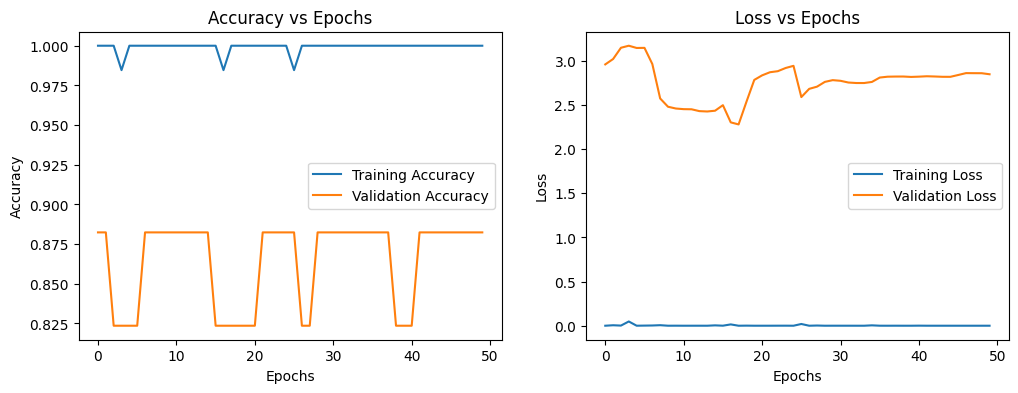

In [69]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

# Plot loss vs epochs
plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

plt.show()

In [70]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f"test set accuracy: {test_accuracy[1] * 100}%")

train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(f"train set accuracy: {train_accuracy[1] * 100}%")

test set accuracy: 88.23529481887817%
train set accuracy: 100.0%


In [73]:
file ="C://Users//adhik//OneDrive//Desktop//indian classical to notation//test//plm_maestro.wav"
x,sr1 = librosa.load(file)
ipd.Audio(x,rate=sr1)

In [74]:
prediction_feature = features_extractor_mfccs(file)
prediction_feature = prediction_feature.reshape(1,-1)
predicted_probabilities = model.predict(prediction_feature)
predicted_class_label = np.argmax(predicted_probabilities)
predicted_class_label = np.array([predicted_class_label])
prediction_class = le.inverse_transform(predicted_class_label)
print("Predicted class:", prediction_class[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: asavari
